### Import The required Libraries

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
plt.rcParams['font.size']=10
plt.rcParams['lines.markersize']=7
plt.rcParams['axes.labelsize']=16
plt.rcParams['figure.figsize'] = (8,5)

### Load The files 

In [30]:
df = pd.read_csv("train.csv", parse_dates=[0])
df_L =pd.read_csv("train_label.csv", names =["Label"])
df["Label"] = df_L["Label"]
df["Month"] = df.datetime.dt.month
df["Year"] = df.datetime.dt.year
df["Hour"] = df.datetime.dt.hour

### Analyze the Data

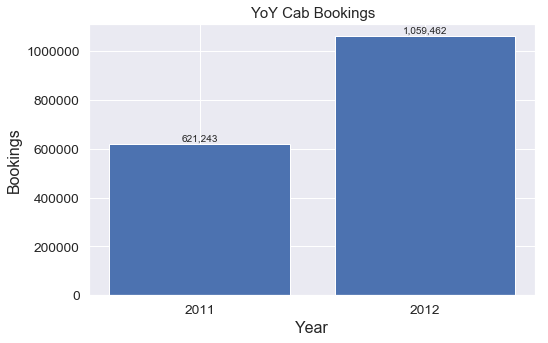

There is a increase of 70.54 percent in the Cab bookings from 2011 to 2012


In [31]:
df1 = df.groupby("Year")["Label"].sum()
df1=pd.DataFrame(df1)
fig, ax = plt.subplots()
X_axis = np.array(list(set(df.Year))).astype(str)
rects1 = ax.bar(X_axis, df1.iloc[:,0])
plt.xlabel("Year")
plt.ylabel("Bookings")
plt.title("YoY Cab Bookings")
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.005*height,
                '{0:,d}'.format(height),
        ha='center', va='bottom')
autolabel(rects1)
plt.show()
Increase = np.round(((df1.iloc[1]-df1.iloc[0])/df1.iloc[0])*100,2)
print("There is a increase of %.2f percent in the Cab bookings from 2011 to 2012" %Increase )

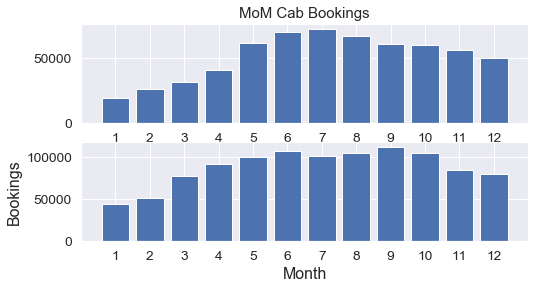

There is a Clear & Cyclic Pattern in a Year
Bookings start with Lowest, at the beginning of the Year
Gradually Bookings increase, at the Mid of the Year bookings reach to the Peak
Later Mid Year, Bookings will dip little bit gradually MoM to close the Year


In [32]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.005*height,
                '{0:,d}'.format(height),
        ha='center', va='bottom')
#---------------------------------------------------------------------
df2 = df.groupby(["Year","Month"], as_index=False)["Label"].sum()
df2=pd.DataFrame(df2, index=None)
df_int = df2[df2.Year==2011]

X_axis = np.array(list(set(df.Month))).astype(str)
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 4))
ax1.set_title('MoM Cab Bookings')
ax2.set_xlabel("Month")
ax2.set_ylabel("Bookings")
rects1 = ax1.bar(X_axis, df_int.iloc[:,2])
#---------------------------------------------------------------------
df_int1 = df2[df2.Year==2012]
X_axis = np.array(list(set(df.Month))).astype(str)
rects2 = ax2.bar(X_axis, df_int1.iloc[:,2])
plt.show()
print("There is a Clear & Cyclic Pattern in a Year")
print("Bookings start with Lowest, at the beginning of the Year")
print("Gradually Bookings increase, at the Mid of the Year bookings reach to the Peak")
print("Later Mid Year, Bookings will dip little bit gradually MoM to close the Year")

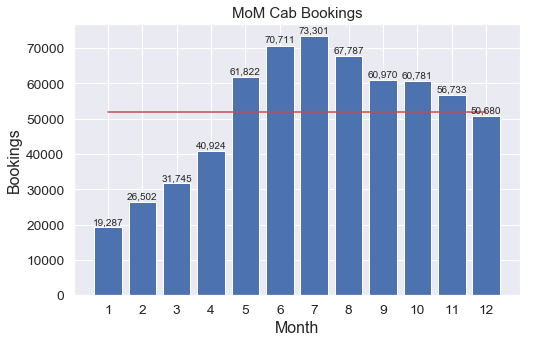

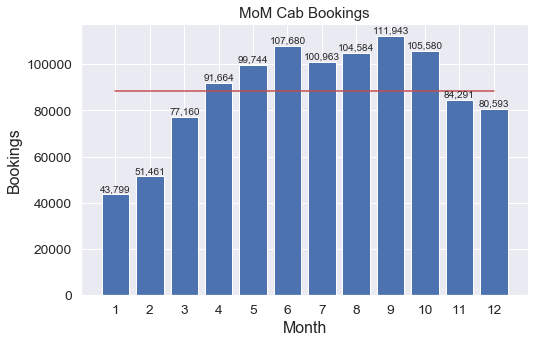

Almost 1/3rd of the bookings in the year are above the mean
First Quarter of the year has bookings less than the mean
Second and Third quarters have fantastic business as the bookings are way above the mean
Last quarter of the year is just okay, with the bookings close enough with avaerage bookings


In [33]:
df2 = df.groupby(["Year","Month"], as_index=False)["Label"].sum()
df2=pd.DataFrame(df2, index=None)
df_int = df2[df2.Year==2011]
fig, ax = plt.subplots()
X_axis = np.array(list(set(df.Month))).astype(str)
rects1 = ax.bar(X_axis, df_int.iloc[:,2])
plt.xlabel("Month")
plt.ylabel("Bookings")
plt.title("MoM Cab Bookings")
plt.plot(X_axis, [df_int.Label.mean() for x1 in X_axis] , color ="r")
autolabel(rects1)
plt.show()
#----------------------------
df_int1 = df2[df2.Year==2012]
fig, ax = plt.subplots()
X_axis = np.array(list(set(df.Month))).astype(str)
rects2 = ax.bar(X_axis, df_int1.iloc[:,2])
plt.xlabel("Month")
plt.ylabel("Bookings")
plt.title("MoM Cab Bookings")
plt.plot(X_axis, [df_int1.Label.mean() for x1 in X_axis], color ="r" )
autolabel(rects2)
plt.show()
print("Almost 1/3rd of the bookings in the year are above the mean")
print("First Quarter of the year has bookings less than the mean")
print("Second and Third quarters have fantastic business as the bookings are way above the mean" )
print("Last quarter of the year is just okay, with the bookings close enough with avaerage bookings")

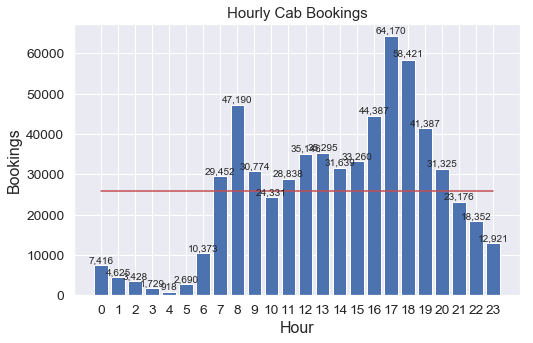

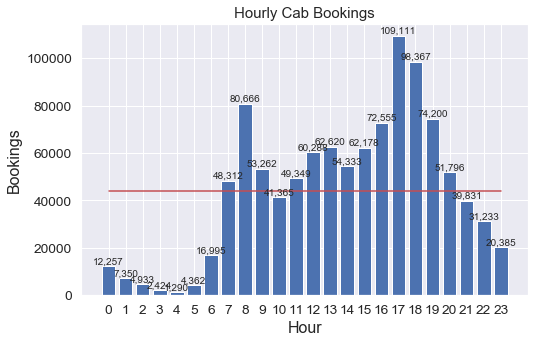

Almost 88.1 percent of the bookings are done in work Hours from 6 AM to 9 PM
8.7 percent of the bookings are done in Night Hours from 9 PM to 12 PM
Only 3.2 percent of the bookings are done in Late Night Hours from 12 PM to 5 AM


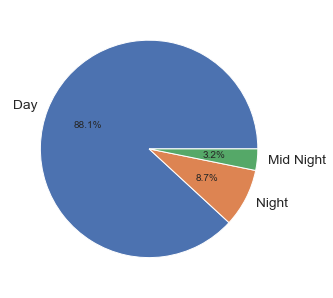

In [34]:
df2 = df.groupby(["Year","Hour"], as_index=False)["Label"].sum()
df2=pd.DataFrame(df2, index=None)
df_int = df2[df2.Year==2011]
fig, ax = plt.subplots()
X_axis = np.array(list(set(df.Hour))).astype(str)
rects1 = ax.bar(X_axis, df_int.iloc[:,2])
plt.xlabel("Hour")
plt.ylabel("Bookings")
plt.title("Hourly Cab Bookings")
plt.plot(X_axis, [df_int.Label.mean() for x1 in X_axis] , color ="r")
autolabel(rects1)
plt.show()
#----------------------------
df_int1 = df2[df2.Year==2012]
fig, ax = plt.subplots()
rects2 = ax.bar(X_axis, df_int1.iloc[:,2])
plt.xlabel("Hour")
plt.ylabel("Bookings")
plt.title("Hourly Cab Bookings")
plt.plot(X_axis, [df_int1.Label.mean() for x1 in X_axis], color ="r" )
autolabel(rects2)
plt.show()
df_int2 = df2[df2.Hour>=6]  
df_int2 = df_int2[df_int2.Hour<21]
WorkHour = np.round((df_int2.Label.sum()/df2.Label.sum())*100,2)
df_int2 = df2[df2.Hour>20]
Night = np.round((df_int2.Label.sum()/df2.Label.sum())*100,2)
df_int2 = df2[df2.Hour<6]
LateNight = np.round((df_int2.Label.sum()/df2.Label.sum())*100,2)
print("Almost %.1f percent of the bookings are done in work Hours from 6 AM to 9 PM" %WorkHour)
print("%.1f percent of the bookings are done in Night Hours from 9 PM to 12 PM" %Night)
print("Only %.1f percent of the bookings are done in Late Night Hours from 12 PM to 5 AM" %LateNight)
plt.pie([WorkHour,Night,LateNight],labels=["Day","Night","Mid Night"],autopct='%1.1f%%' )
plt.show()

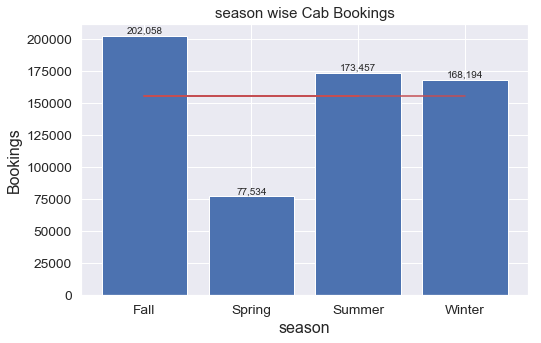

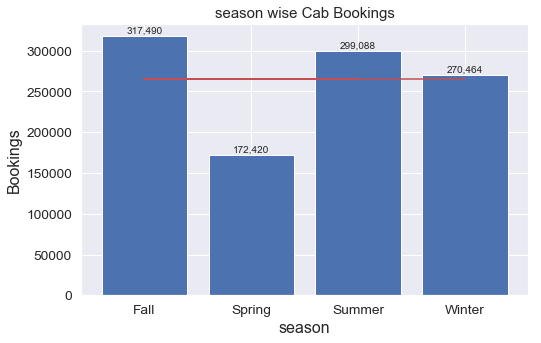

Almost 32.5 percent of the bookings are done in Fall
55.0 percent of the bookings are done in Winter and Summer
Spring has the least bookings done: 12.5 percent 


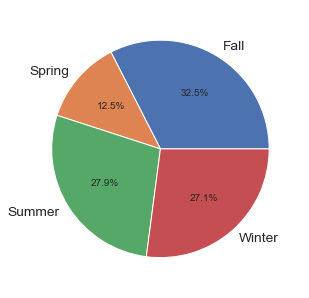

In [35]:
df2 = df.groupby(["Year","season"], as_index=False)["Label"].sum()
df2=pd.DataFrame(df2, index=None)
df_int = df2[df2.Year==2011]
fig, ax = plt.subplots()
X_axis = np.array(list(set(df.season))).astype(str)
rects1 = ax.bar(df_int.iloc[:,1], df_int.iloc[:,2])
plt.xlabel("season")
plt.ylabel("Bookings")
plt.title("season wise Cab Bookings")
plt.plot(X_axis, [df_int.Label.mean() for x1 in df_int.iloc[:,1]] , color ="r")
autolabel(rects1)
plt.show()
#----------------------------
df_int1 = df2[df2.Year==2012]
fig, ax = plt.subplots()
rects2 = ax.bar(df_int1.iloc[:,1], df_int1.iloc[:,2])
plt.xlabel("season")
plt.ylabel("Bookings")
plt.title("season wise Cab Bookings")
plt.plot(X_axis, [df_int1.Label.mean() for x1 in df_int1.iloc[:,1]], color ="r" )
autolabel(rects2)
plt.show()
df3 = df2[df2.Year ==2011]
df_int2 = df3[df3.season =="Fall"]  
Fall = np.round((df_int2.Label.sum()/df3.Label.sum())*100,2)
df_int2 = df3[df3.season =="Spring"] 
Spring = np.round((df_int2.Label.sum()/df3.Label.sum())*100,2)
df_int2 = df3[df3.season =="Summer"] 
Summer = np.round((df_int2.Label.sum()/df3.Label.sum())*100,2)
df_int2 = df3[df3.season =="Winter"] 
Winter = np.round((df_int2.Label.sum()/df3.Label.sum())*100,2)
print("Almost %.1f percent of the bookings are done in Fall" %Fall)
print("%.1f percent of the bookings are done in Winter and Summer" %(Winter+Summer))
print("Spring has the least bookings done: %.1f percent " %Spring)
dfx =pd.DataFrame()
dfx["Seasons"] = pd.Series(np.array(["Fall","Spring","Summer", "Winter"]))
dfx["Val"] = pd.Series(np.array([Fall,Spring,Summer,Winter]))
plt.pie(dfx.Val,labels=dfx.Seasons,autopct='%1.1f%%')
plt.show()

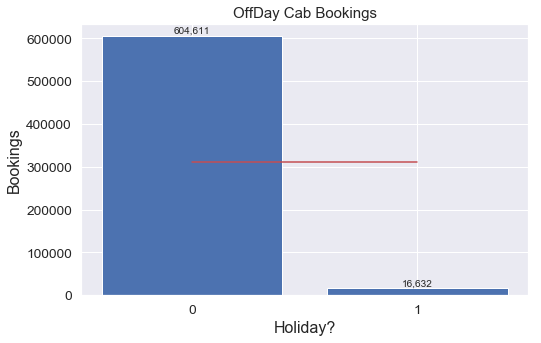

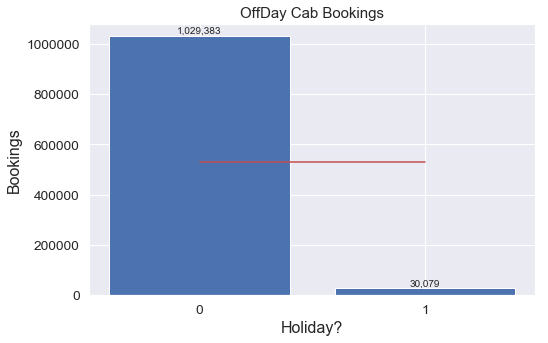

People Try to be Stationary, rather than Travelling on Holidays with cab bookings done as least as 2.8


In [36]:
df2 = df.groupby(["Year","holiday"], as_index=False)["Label"].sum()
df2=pd.DataFrame(df2, index=None)
df_int = df2[df2.Year==2011]
fig, ax = plt.subplots()
X_axis = np.array(list(set(df.holiday))).astype(str)
rects1 = ax.bar(X_axis, df_int.iloc[:,2])
plt.xlabel("Holiday?")
plt.ylabel("Bookings")
plt.title("OffDay Cab Bookings")
plt.plot(X_axis, [df_int.Label.mean() for x1 in X_axis] , color ="r")
autolabel(rects1)
plt.show()
#----------------------------
df_int1 = df2[df2.Year==2012]
fig, ax = plt.subplots()
rects2 = ax.bar(X_axis, df_int1.iloc[:,2])
plt.xlabel("Holiday?")
plt.ylabel("Bookings")
plt.title("OffDay Cab Bookings")
plt.plot(X_axis, [df_int1.Label.mean() for x1 in X_axis], color ="r" )
autolabel(rects2)
plt.show()
df_int2 = df2[df2.holiday==0]  
WorkDay = np.round((df_int2.Label.sum()/df2.Label.sum())*100,2)
Holiday = 100- WorkDay
print("People Try to be Stationary, rather than Travelling on Holidays with cab bookings done as least as %.1f" %Holiday)

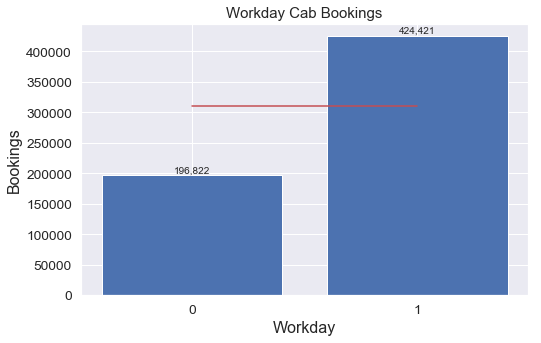

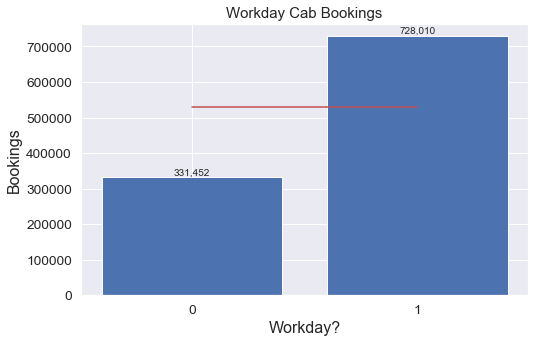

68.6 of the prople does not travel on Non Working Days


In [37]:
df2 = df.groupby(["Year","workingday"], as_index=False)["Label"].sum()
df2=pd.DataFrame(df2, index=None)
df_int = df2[df2.Year==2011]
fig, ax = plt.subplots()
X_axis = np.array(list(set(df.workingday))).astype(str)
rects1 = ax.bar(X_axis, df_int.iloc[:,2])
plt.xlabel("Workday")
plt.ylabel("Bookings")
plt.title("Workday Cab Bookings")
plt.plot(X_axis, [df_int.Label.mean() for x1 in X_axis] , color ="r")
autolabel(rects1)
plt.show()
#----------------------------
df_int1 = df2[df2.Year==2012]
fig, ax = plt.subplots()
rects2 = ax.bar(X_axis, df_int1.iloc[:,2])
plt.xlabel("Workday?")
plt.ylabel("Bookings")
plt.title("Workday Cab Bookings")
plt.plot(X_axis, [df_int1.Label.mean() for x1 in X_axis], color ="r" )
autolabel(rects2)
plt.show()
df_int2 = df2[df2.workingday==1]  
WorkDay = np.round((df_int2.Label.sum()/df2.Label.sum())*100,2)
Holiday = 100- WorkDay
print("%.1f of the prople does not travel on Non Working Days" %WorkDay)

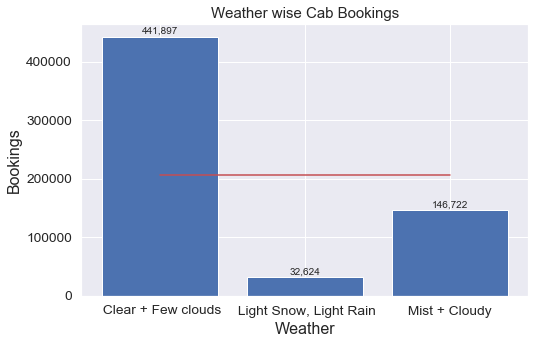

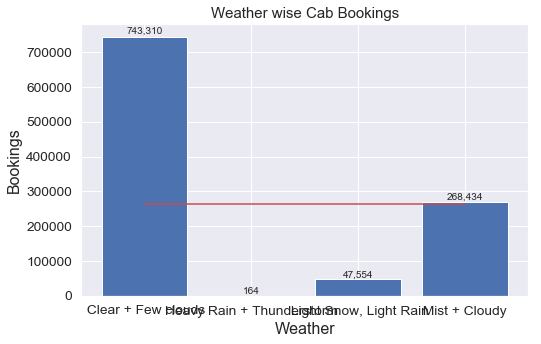

Almost 71.1 percent of the bookings are done in Clear Weather
Very Few People Travel in Rainy/Snowy Conditions: 5.2 percent 
And near Average number of bookings are done in Cloudy Weather Conditions: 23.6 percent 


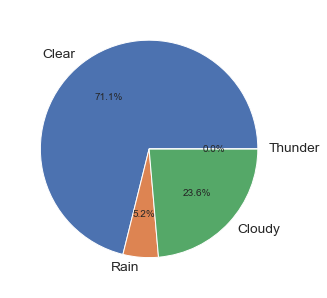

In [38]:
df2 = df.groupby(["Year","weather"], as_index=False)["Label"].sum()
df2=pd.DataFrame(df2, index=None)
df_int = df2[df2.Year==2011]
fig, ax = plt.subplots()

rects1 = ax.bar(df_int.iloc[:,1], df_int.iloc[:,2])
plt.xlabel("Weather")
plt.ylabel("Bookings")
plt.title("Weather wise Cab Bookings")
plt.plot(df_int.iloc[:,1], [df_int.Label.mean() for x1 in df_int.iloc[:,1]] , color ="r")
autolabel(rects1)
plt.show()
#----------------------------
df_int1 = df2[df2.Year==2012]
fig, ax = plt.subplots()
rects2 = ax.bar(df_int1.iloc[:,1], df_int1.iloc[:,2])
plt.xlabel("Weather")
plt.ylabel("Bookings")
plt.title("Weather wise Cab Bookings")
plt.plot(df_int1.iloc[:,1], [df_int1.Label.mean() for x1 in df_int1.iloc[:,1]], color ="r" )
autolabel(rects2)
plt.show()
df4 = df2[df2.Year ==2011]
df_int2 = df4[df4.weather ==" Clear + Few clouds"]  
Clear = np.round((df_int2.Label.sum()/df4.Label.sum())*100,2)
df_int2 = df4[df4.weather ==" Light Snow, Light Rain"] 
Rain = np.round((df_int2.Label.sum()/df4.Label.sum())*100,2)
df_int2 = df4[df4.weather ==" Mist + Cloudy "] 
Cloudy = np.round((df_int2.Label.sum()/df4.Label.sum())*100,2)
df_int2 = df4[df4.weather ==" Heavy Rain + Thunderstorm "] 
Thunder = np.round((df_int2.Label.sum()/df4.Label.sum())*100,2)
 
print("Almost %.1f percent of the bookings are done in Clear Weather" %Clear)
print("Very Few People Travel in Rainy/Snowy Conditions: %.1f percent " %Rain)
print("And near Average number of bookings are done in Cloudy Weather Conditions: %.1f percent " %Cloudy)
dfx =pd.DataFrame()
dfx["Weather"] = pd.Series(np.array(["Clear","Rain","Cloudy","Thunder"]))
dfx["Val"] = pd.Series(np.array([Clear,Rain,Cloudy,Thunder]))
plt.pie(dfx.Val,labels=dfx.Weather,autopct='%1.1f%%')
plt.show()

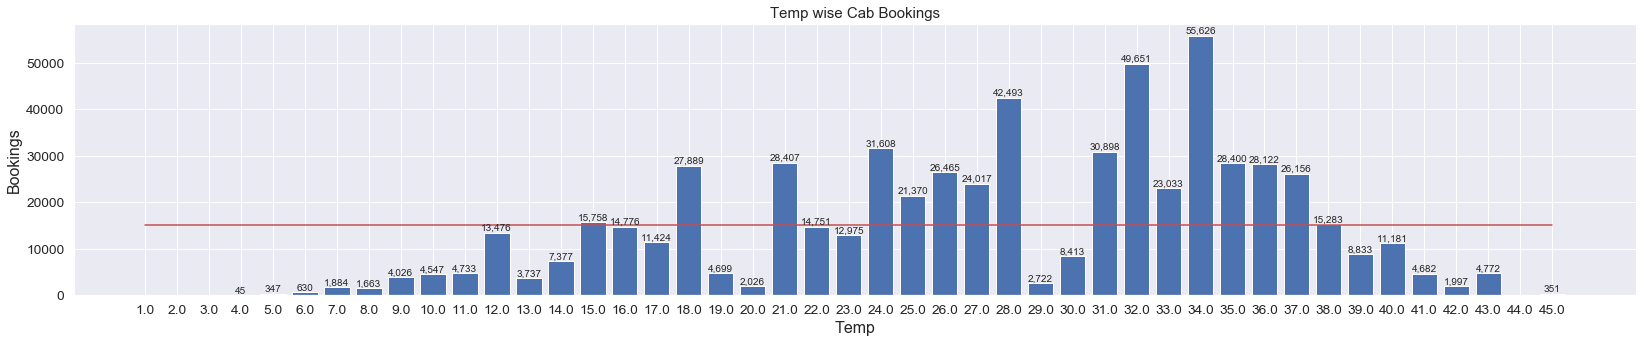

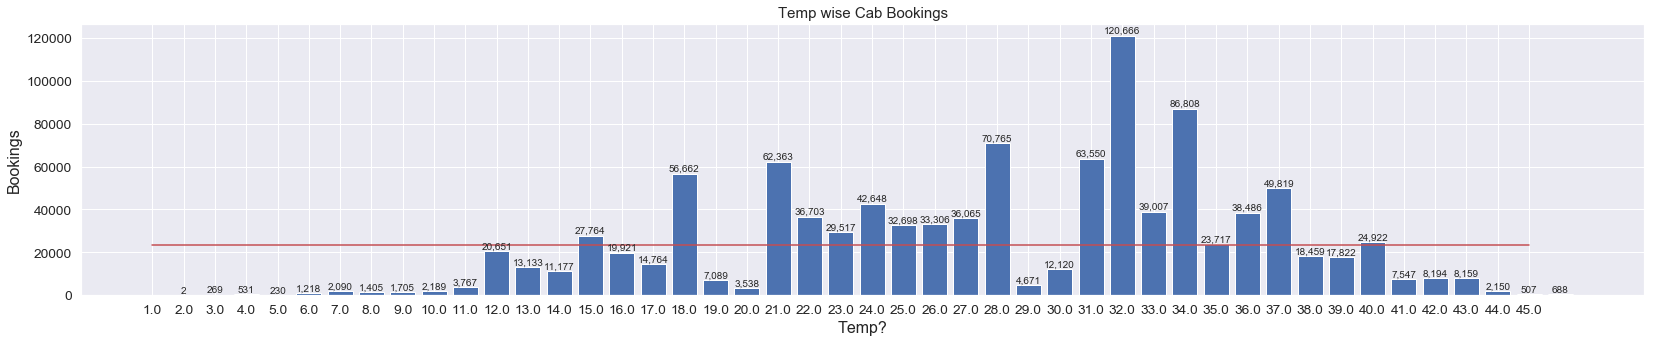

Temperature Does not really affect the Cab Booking, as we don not see a strong correalation here
However at abnormal temperatures there is a very low booking, but thats related to off duty hours


In [39]:
df["atemp_1"] =np.round(df.atemp,0)
df2 = df.groupby(["Year","atemp_1"], as_index=False)["Label"].sum()
df2=pd.DataFrame(df2, index=None)
df_int = df2[df2.Year==2011]
fig, ax = plt.subplots(figsize =(28,5))
X_axis = np.array(list(set(df.atemp_1))).astype(str)
rects1 = ax.bar(df_int.iloc[:,1], df_int.iloc[:,2])
plt.xlabel("Temp")
plt.ylabel("Bookings")
plt.title("Temp wise Cab Bookings")
plt.plot(X_axis, [df_int.Label.mean() for x1 in X_axis] , color ="r")
autolabel(rects1)
plt.show()
#----------------------------
df_int1 = df2[df2.Year==2012]
fig, ax = plt.subplots(figsize =(28,5))
rects2 = ax.bar(df_int1.iloc[:,1], df_int1.iloc[:,2])
plt.xlabel("Temp?")
plt.ylabel("Bookings")
plt.title("Temp wise Cab Bookings")
plt.plot(X_axis, [df_int1.Label.mean() for x1 in X_axis], color ="r" )
autolabel(rects2)
plt.show()
print("Temperature Does not really affect the Cab Booking, as we don not see a strong correalation here")
print("However at abnormal temperatures there is a very low booking, but thats related to off duty hours")


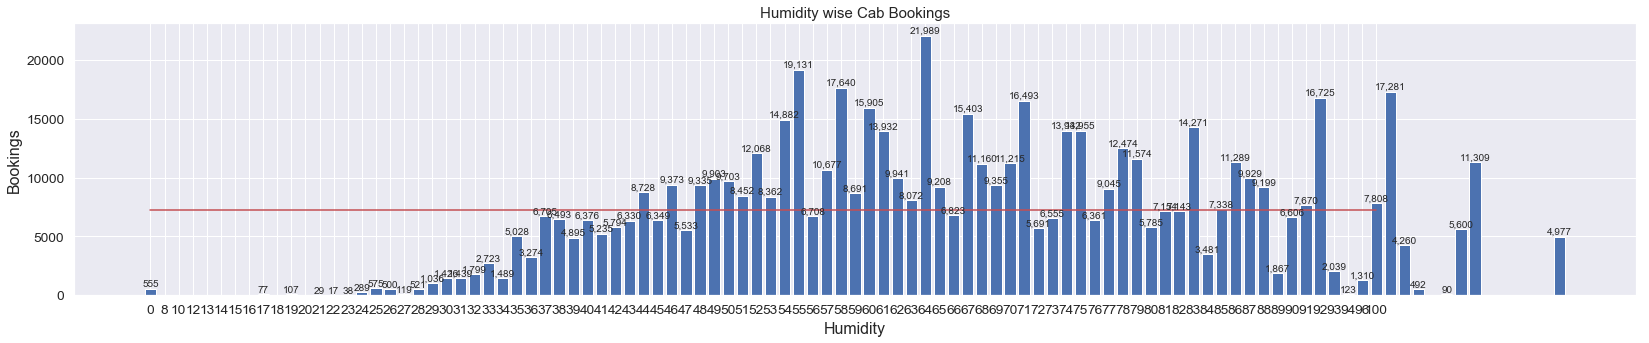

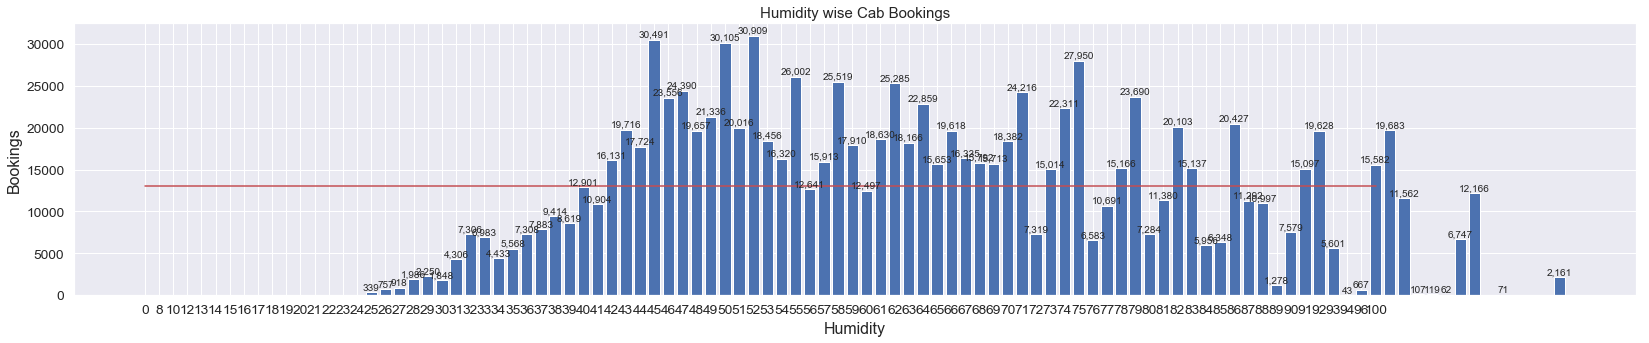

Humidity Does not really affect the Cab Booking, as we don not see a strong correalation here
There seems to be Strong correlation between Temperature/Humidity


In [40]:
df["Humid_1"] =np.round(df.humidity,0)
df2 = df.groupby(["Year","Humid_1"], as_index=False)["Label"].sum()
df2=pd.DataFrame(df2, index=None)
df_int = df2[df2.Year==2011]
fig, ax = plt.subplots(figsize =(28,5))
X_axis = np.array(list(set(df.Humid_1))).astype(str)
rects1 = ax.bar(df_int.iloc[:,1], df_int.iloc[:,2])
plt.xlabel("Humidity")
plt.ylabel("Bookings")
plt.title("Humidity wise Cab Bookings")
plt.plot(X_axis, [df_int.Label.mean() for x1 in X_axis] , color ="r")
autolabel(rects1)
plt.show()
#----------------------------
df_int1 = df2[df2.Year==2012]
fig, ax = plt.subplots(figsize =(28,5))
rects2 = ax.bar(df_int1.iloc[:,1], df_int1.iloc[:,2])
plt.xlabel("Humidity")
plt.ylabel("Bookings")
plt.title("Humidity wise Cab Bookings")
plt.plot(X_axis, [df_int1.Label.mean() for x1 in X_axis], color ="r" )
autolabel(rects2)
plt.show()
print("Humidity Does not really affect the Cab Booking, as we don not see a strong correalation here")
print("There seems to be Strong correlation between Temperature/Humidity")

### Missing Value Analysis

In [41]:
print(df.isnull().sum()*100/len(df))
print("None of the columns have missing Values, hence no need to process of missing Values")

datetime      0.0
season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
Label         0.0
Month         0.0
Year          0.0
Hour          0.0
atemp_1       0.0
Humid_1       0.0
dtype: float64
None of the columns have missing Values, hence no need to process of missing Values


### Outlier Analysis

=========OUTLIER ANALYSIS REPORT==========
Total Records  :   8708
Q1 is          :   43.0
Q3 is          :   286.0
IQR is         :   243.0
LSL is         :   -321.5
USL is         :   650.5
No of Outliers :   242
=============END OF THE REPORT===========

Total Bookings:  17,516,187
Total Outlier Bookings:  182,295
Percentage of Outlier Bookings:  1.0
Since All the Outliers fall in Year 2012, lets calculate the percentage for 2012
Percentage of Outlier Bookings for 2012:  17.0
Below is the Monthwise Spread of Outliers in 2012

  Month Label_Count Label_Sum
0     3          12     8,589
1     4          24    17,035
2     5          22    16,096
3     6          36    26,803
4     7          20    15,191
5     8          34    26,299
6     9          44    34,451
7    10          31    24,762
8    11           9     6,092
9    12          10     6,977
Since There is a Clear Monthwise Repeating pattern in both the Years, Let's not remove the Outliers


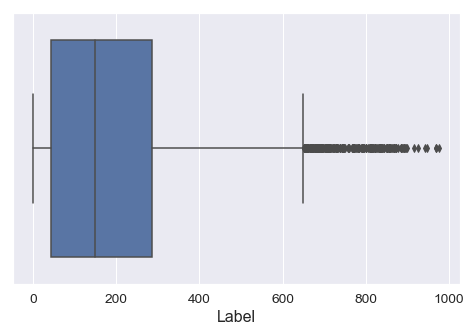

In [42]:
init_len = len(df)
print("=========OUTLIER ANALYSIS REPORT==========")
print("Total Records  :  ", init_len)

def remove_outliers(df_in, col_name):
    Q1 = df_in[col_name].quantile(0.25)
    print("Q1 is          :  ",Q1)
    Q3 = df_in[col_name].quantile(0.75)
    print("Q3 is          :  ",Q3)
    IQR = Q3-Q1
    print("IQR is         :  ",IQR)
    LSL = Q1-(1.5*IQR)
    USL = Q3+(1.5*IQR)
    print("LSL is         :  ",LSL)
    print("USL is         :  ",USL)
    Out = df_in.loc[(df_in[col_name] > USL) | (df_in[col_name] < LSL)]
    x= round(IQR,1)
    return Out
df_Outliers = remove_outliers(df,"Label")
ln = len(df_Outliers)
print("No of Outliers :  ", ln)
print("=============END OF THE REPORT===========\n")

sns.boxplot(x=df['Label'])

print("Total Bookings: ", '{0:,d}'.format(df.Year.sum()))
print("Total Outlier Bookings: ",'{0:,d}'.format(df_Outliers.Label.sum()))
print("Percentage of Outlier Bookings: ",np.round((df_Outliers.Label.sum()/df.Year.sum())*100))
print("Since All the Outliers fall in Year 2012, lets calculate the percentage for 2012")
df_2012 = df[df.Year==2012]
print("Percentage of Outlier Bookings for 2012: ",np.round((df_Outliers.Label.sum()/df_2012.Label.sum())*100))
print("Below is the Monthwise Spread of Outliers in 2012\n")
dfy =pd.DataFrame(df_Outliers.groupby("Month", as_index =False)["Label"].count())
dfy1 =pd.DataFrame(df_Outliers.groupby("Month",as_index =False)["Label"].sum())
dfz = dfy.merge(dfy1, on ="Month", suffixes=('_Count', '_Sum'))
dfz = dfz.applymap('{0:,d}'.format)
print(dfz)
print("Since There is a Clear Monthwise Repeating pattern in both the Years, Let's not remove the Outliers")



### Encode the Categorical Values

In [43]:
dfs =df.copy(deep=True)
dfs["season"] = dfs["season"].map({"Fall":1,"Spring":2, "Summer":3,"Winter": 4})
dfs["weather"] = dfs["weather"].map({" Clear + Few clouds":1," Light Snow, Light Rain":2, " Mist + Cloudy ":3," Heavy Rain + Thunderstorm ": 4})
dfx = dfs.copy(deep=True)
#print(dfx)

### Correlation Analysis

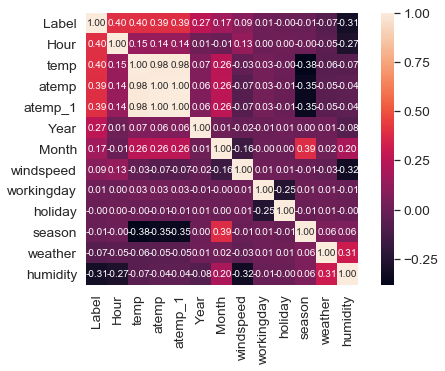

In [44]:
corrmat = dfx.corr()
k = 13 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Label')['Label'].index
cm = np.corrcoef(dfx[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,)
plt.show()

### Dimensionality reduction and Feuture Extraction

In [45]:
dfx1 = dfx.drop()
print(dfx.head())

             datetime  season  holiday  workingday  weather   temp   atemp  \
0 2012-05-02 19:00:00       3        0           1        1  22.14  25.760   
1 2012-09-05 04:00:00       1        0           1        1  28.70  33.335   
2 2011-01-13 09:00:00       2        0           1        1   5.74   6.060   
3 2011-11-18 16:00:00       4        0           1        1  13.94  16.665   
4 2011-09-13 13:00:00       1        0           1        1  30.34  33.335   

   humidity  windspeed  Label  Month  Year  Hour  atemp_1  Humid_1  
0        77    16.9979    504      5  2012    19     26.0       77  
1        79    19.0012      5      9  2012     4     33.0       79  
2        50    22.0028    139      1  2011     9      6.0       50  
3        29     8.9981    209     11  2011    16     17.0       29  
4        51    19.0012    184      9  2011    13     33.0       51  


In [46]:
dfx_v = dfx1/dfx1.mean()
print(np.round(dfx_v.var(),4)<0.1)
print("Lets drop columns which have Variance Less Than 0.1")
dfx2 = dfx1.drop(["humidity","Year"], axis=1)
print("With this we reduced 2 feautres: Humidity & Year")

season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity       True
windspeed     False
Label         False
Month         False
Year           True
Hour          False
atemp_1       False
Humid_1        True
dtype: bool
Lets drop columns which have Variance Less Than 0.1
With this we reduced 2 feautres: Humidity & Year


In [47]:
print(np.round(dfx.corr()*100,2)>90)
print("Let's drop Parameters which have correlatin Greater than 90%")
dfx3 = dfx2.drop(["temp"], axis=1)
print("With this we reduced 1 feautre: Temperature")

            season  holiday  workingday  weather   temp  atemp  humidity  \
season        True    False       False    False  False  False     False   
holiday      False     True       False    False  False  False     False   
workingday   False    False        True    False  False  False     False   
weather      False    False       False     True  False  False     False   
temp         False    False       False    False   True   True     False   
atemp        False    False       False    False   True   True     False   
humidity     False    False       False    False  False  False      True   
windspeed    False    False       False    False  False  False     False   
Label        False    False       False    False  False  False     False   
Month        False    False       False    False  False  False     False   
Year         False    False       False    False  False  False     False   
Hour         False    False       False    False  False  False     False   
atemp_1     

In [48]:
dfx_Y = dfx3["Label"]
dfx_X = dfx3.drop("Label",axis=1)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(dfx_X, dfx_Y)
rf_feat = pd.Series(rf.feature_importances_, index=dfx_X.columns)
print(rf_feat*100)
print("Lets drop columns which have Random Forest Feuture Importance Less Than 1")
dfx = dfx.drop(["holiday"], axis=1)
print("With this we reduced 1 feautre: Holiday")

C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


season         2.887030
holiday        0.681861
workingday     2.802613
weather        4.777191
atemp         12.728924
windspeed     18.544187
Month          9.139705
Hour          18.368895
atemp_1       10.398420
Humid_1       19.671173
dtype: float64
Lets drop columns which have Random Forest Feuture Importance Less Than 1
With this we reduced 1 feautre: Holiday


### Grid Search

In [20]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': np.arange(1,9), 'max_features': np.arange(1,5)}
gcv = GridSearchCV(rf, params, scoring='accuracy', cv=5)
gcv.fit(dfx_X, dfx_Y)
print(gcv.best_params_)
print(gcv.best_score_)

C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


{'max_depth': 8, 'max_features': 4}
0.022967386311437757


C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Feature extraction

In [50]:
#dfx4= dfx3.drop(["datetime"])
gcv.fit(dfx3, df_L)
print(gcv.best_params_)
print(gcv.best_score_)

C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\s

C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant.l\AppData\Local\Continuum\ana

C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant.l\AppData\Local\Continuum\ana

C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant.l\AppData\Local\Continuum\ana

C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant.l\AppData\Local\Continuum\ana

C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant.l\AppData\Local\Continuum\ana

C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nishant.l\AppData\Local\Continuum\ana

{'max_depth': 8, 'max_features': 4}
0.18396876435461645


In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
col_names = dfx3.columns
SS=StandardScaler()
X = SS.fit_transform(dfx3)
X=pd.DataFrame(X, columns=col_names)
X.head()
pca = PCA()
new_feat1 = pca.fit_transform(X)
print(new_feat1.shape)
np.round(pca.explained_variance_ratio_.cumsum(), 3)

(8708, 11)


C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([0.233, 0.394, 0.523, 0.637, 0.729, 0.805, 0.873, 0.926, 0.968,
       1.   , 1.   ])

In [52]:
np.round(pca.explained_variance_ratio_.cumsum(), 3)

array([0.233, 0.394, 0.523, 0.637, 0.729, 0.805, 0.873, 0.926, 0.968,
       1.   , 1.   ])

In [53]:
pca = PCA(n_components=7)
new_feat2 = pca.fit_transform(X)
new_feat2.shape
new_feat2_df = pd.DataFrame(new_feat2)
np.round(new_feat2_df.corr(), 2)

,0,1,2,3,4,5,6
0,1.0,0.0,-0.0,0.0,-0.0,0.0,-0.0
1,0.0,1.0,0.0,-0.0,-0.0,-0.0,-0.0
2,-0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,-0.0,0.0,1.0,-0.0,0.0,-0.0
4,-0.0,-0.0,0.0,-0.0,1.0,0.0,-0.0
5,0.0,-0.0,0.0,0.0,0.0,1.0,0.0
6,-0.0,-0.0,0.0,-0.0,-0.0,0.0,1.0


### Linear Regression with Feature Extraction

In [55]:
reg = LinearRegression()
reg.fit(new_feat2_df, df_L).score(new_feat2_df, df_L)

print(reg.fit(new_feat2_df, df_L).score(new_feat2_df, df_L))

0.6770821817973725


In [56]:
print(dfx.head())

             datetime  season  workingday  weather   temp   atemp  humidity  \
0 2012-05-02 19:00:00       3           1        1  22.14  25.760        77   
1 2012-09-05 04:00:00       1           1        1  28.70  33.335        79   
2 2011-01-13 09:00:00       2           1        1   5.74   6.060        50   
3 2011-11-18 16:00:00       4           1        1  13.94  16.665        29   
4 2011-09-13 13:00:00       1           1        1  30.34  33.335        51   

   windspeed  Label  Month  Year  Hour  atemp_1  Humid_1  
0    16.9979    504      5  2012    19     26.0       77  
1    19.0012      5      9  2012     4     33.0       79  
2    22.0028    139      1  2011     9      6.0       50  
3     8.9981    209     11  2011    16     17.0       29  
4    19.0012    184      9  2011    13     33.0       51  


In [59]:
params = {'max_depth': np.arange(1,6), 'max_features': np.arange(1,7)}
gcv = GridSearchCV(rf, params, scoring='accuracy', cv=5)
gcv.fit(new_feat2_df, dfx_Y)
print(gcv.best_params_)
print(gcv.best_score_)

C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 5, 'max_features': 5}
0.019407441433164904


In [60]:
pca = PCA(n_components=4)
new_feat2 = pca.fit_transform(X)
new_feat2.shape
new_feat2_df = pd.DataFrame(new_feat2)
np.round(new_feat2_df.corr(), 2)

,0,1,2,3
0,1.0,0.0,-0.0,-0.0
1,0.0,1.0,-0.0,-0.0
2,-0.0,-0.0,1.0,0.0
3,-0.0,-0.0,0.0,1.0


In [61]:
params = {'max_depth': np.arange(1,7), 'max_features': np.arange(1,5)}
gcv = GridSearchCV(rf, params, scoring='accuracy', cv=5)
gcv.fit(new_feat2_df, dfx_Y)
print(gcv.best_params_)
print(gcv.best_score_)

C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\nishant.l\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 6, 'max_features': 2}
0.018373909049150206


In [74]:
dfx_test_X = pd.read_csv("test.csv")
dfx_test_X = dfx_test_X.drop(["datetime"], axis=1)
dfx_test_X["season"] = dfx_test_X["season"].map({"Fall":1,"Spring":2, "Summer":3,"Winter": 4})
dfx_test_X["weather"] = dfx_test_X["weather"].map({" Clear + Few clouds":1," Light Snow, Light Rain":2, " Mist + Cloudy ":3," Heavy Rain + Thunderstorm ": 4})
dfx_test_X = dfx_test_X.drop(["holiday","temp"],axis=1)
dfx_test_Y = pd.read_csv("test_label.csv",names =["Label"])


print(dfx_test_X.head())
dfx4 = dfx.drop(["Label","Year","Month","Hour","datetime","temp","atemp_1","Humid_1"], axis=1)
print(dfx_test_Y.head())
print(dfx4.head())
reg = LinearRegression()
reg.fit(dfx4, df_L)
df_L_pred = reg.predict(dfx_test_X)
print(dfx_test_Y.shape)
print(df_L_pred.shape)
mse = mean_squared_error(dfx_test_Y, df_L_pred)
r2_score = reg.score(dfx_test_X, dfx_test_Y)
print(np.sqrt(mse))
print(r2_score)

   season  workingday  weather   atemp  humidity  windspeed
0       3           1        1  25.000        48    35.0008
1       3           0        1  27.275        64     7.0015
2       2           0        2  12.120       100    27.9993
3       4           1        3  28.790        83     0.0000
4       3           0        1  31.060        43    23.9994
   Label
0    256
1     87
2     11
3     84
4    668
   season  workingday  weather   atemp  humidity  windspeed
0       3           1        1  25.760        77    16.9979
1       1           1        1  33.335        79    19.0012
2       2           1        1   6.060        50    22.0028
3       4           1        1  16.665        29     8.9981
4       1           1        1  33.335        51    19.0012
(2178, 1)
(2178, 1)
151.8759653473814
0.2832333029700449
